In [42]:
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)

In [55]:
df_fc = pd.read_csv('data/Fare_Card.csv')
df_fc.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,08/06/2021,07/31/2021,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,6355,92.0,159.0,3.0,19,552,539,162,0,717,0,0,0,327,0,0
1,08/06/2021,07/31/2021,R003,CYPRESS HILLS,1323,134,3,13,0,817,424,0.0,8.0,0.0,0,14,12,19,0,11,0,0,0,70,0,0
2,08/06/2021,07/31/2021,R004,75TH STREET & ELDERTS LANE,4241,321,15,43,0,2029,992,0.0,13.0,0.0,1,81,14,31,0,28,0,0,0,301,0,0
3,08/06/2021,07/31/2021,R005,85TH STREET & FOREST PKWAY,4418,389,29,30,1,1999,1108,3.0,12.0,0.0,0,44,13,25,0,40,0,0,0,111,0,0
4,08/06/2021,07/31/2021,R006,WOODHAVEN BOULEVARD,4193,315,27,55,0,2946,1518,3.0,27.0,0.0,1,64,36,14,0,25,0,0,0,148,0,0


In [56]:
# transform the date column to datetime format, month/day/year
df_fc['From Date'] = pd.to_datetime(df_fc['From Date'], format='%m/%d/%Y')
df_fc['To Date'] = pd.to_datetime(df_fc['To Date'], format='%m/%d/%Y')
df_fc.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,2021-08-06,2021-07-31,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,6355,92.0,159.0,3.0,19,552,539,162,0,717,0,0,0,327,0,0
1,2021-08-06,2021-07-31,R003,CYPRESS HILLS,1323,134,3,13,0,817,424,0.0,8.0,0.0,0,14,12,19,0,11,0,0,0,70,0,0
2,2021-08-06,2021-07-31,R004,75TH STREET & ELDERTS LANE,4241,321,15,43,0,2029,992,0.0,13.0,0.0,1,81,14,31,0,28,0,0,0,301,0,0
3,2021-08-06,2021-07-31,R005,85TH STREET & FOREST PKWAY,4418,389,29,30,1,1999,1108,3.0,12.0,0.0,0,44,13,25,0,40,0,0,0,111,0,0
4,2021-08-06,2021-07-31,R006,WOODHAVEN BOULEVARD,4193,315,27,55,0,2946,1518,3.0,27.0,0.0,1,64,36,14,0,25,0,0,0,148,0,0


<AxesSubplot: >

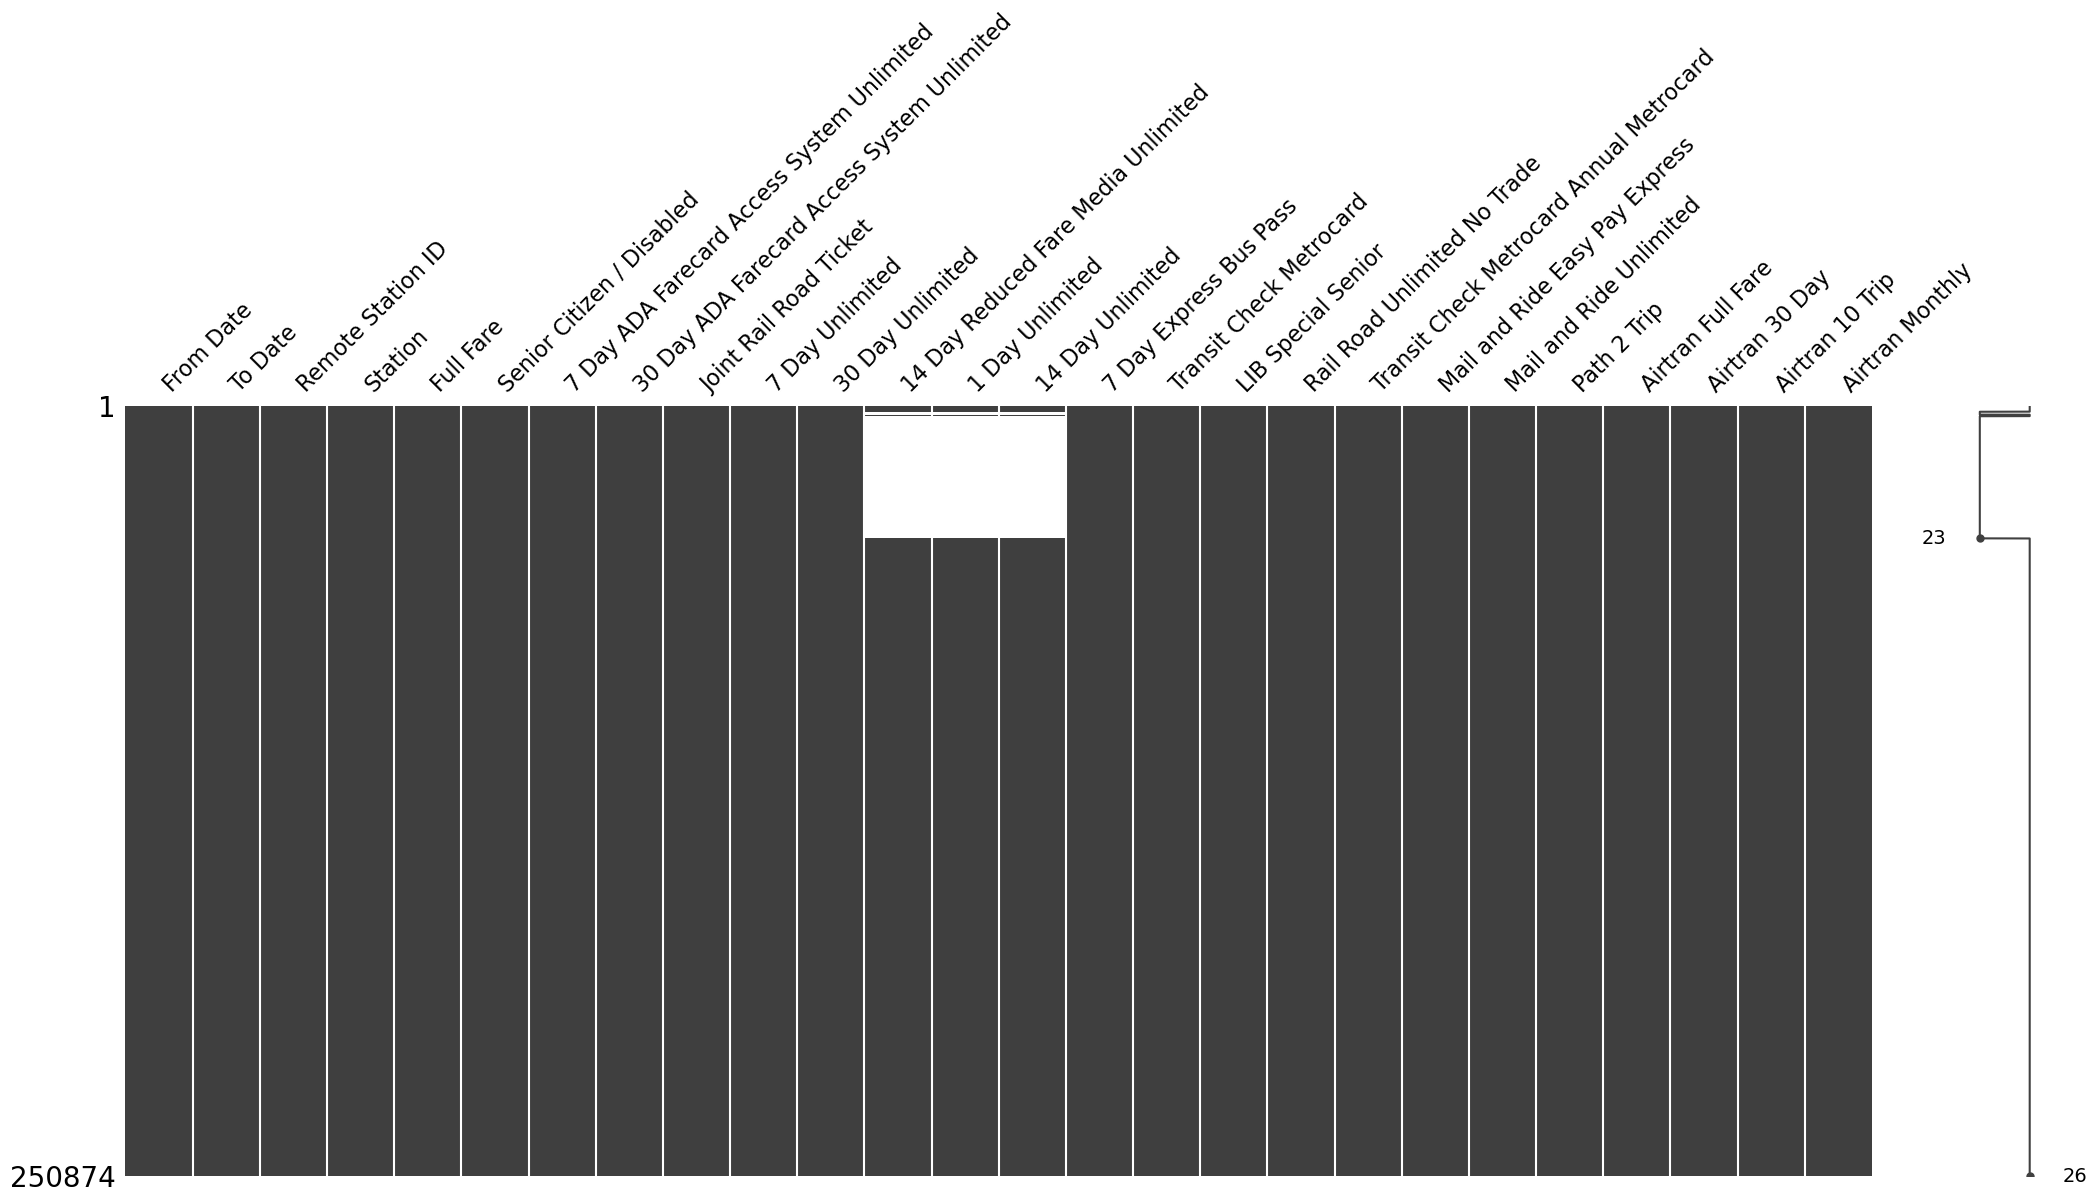

In [57]:
# missing values
import missingno
missingno.matrix(df_fc)

In [58]:
# Check the date range for rows with missing values in 1 Day Unlimited column
df_fc[df_fc['1 Day Unlimited'].isnull()]['From Date'].dt.strftime('%m-%d-%y').unique()

array(['11-21-20', '11-14-20', '10-31-20', '10-24-20', '10-17-20',
       '10-10-20', '10-03-20', '09-26-20', '09-19-20', '09-12-20',
       '09-05-20', '08-29-20', '08-22-20', '08-15-20', '08-08-20',
       '08-01-20', '07-25-20', '07-18-20', '07-11-20', '07-04-20',
       '06-27-20', '06-20-20', '06-13-20', '06-06-20', '05-30-20',
       '05-23-20', '05-16-20', '05-09-20', '05-02-20', '04-25-20',
       '04-18-20', '04-11-20', '03-28-20', '03-21-20', '03-14-20',
       '03-07-20', '02-29-20', '02-22-20', '02-15-20', '02-08-20',
       '02-01-20', '01-25-20', '01-18-20', '01-11-20', '01-04-20',
       '12-28-19', '12-21-19', '12-14-19', '12-07-19', '11-30-19',
       '11-23-19', '11-16-19', '11-09-19', '11-02-19', '10-26-19',
       '10-19-19', '10-12-19', '10-05-19', '09-28-19', '09-21-19',
       '09-14-19', '09-07-19', '08-31-19', '08-24-19', '08-17-19',
       '08-10-19', '08-03-19', '07-27-19', '07-20-19', '07-13-19',
       '07-06-19', '06-29-19', '06-22-19', '06-15-19', '06-08-

In [59]:
# check  if from date is earlier than to date
df_fc['flipped'] = df_fc['From Date'] > df_fc['To Date']
df_fc_flipped = df_fc[df_fc['flipped'] == True]

In [60]:
df_fc_flipped[['From Date', 'To Date']].drop_duplicates()

,From Date,To Date
0,2021-08-06,2021-07-31
469,2021-07-23,2021-07-17
937,2021-07-09,2021-07-03
2845,2020-11-06,2020-10-31


In [61]:
# Flip the rows with (From Date > To Date)
df_fc_flipped_fixed = df_fc_flipped.copy()
df_fc_flipped_fixed[['From Date', 'To Date']] = df_fc_flipped[['To Date', 'From Date']].values
df_fc_flipped_fixed.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly,flipped
0,2021-07-31,2021-08-06,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,6355,92.0,159.0,3.0,19,552,539,162,0,717,0,0,0,327,0,0,True
1,2021-07-31,2021-08-06,R003,CYPRESS HILLS,1323,134,3,13,0,817,424,0.0,8.0,0.0,0,14,12,19,0,11,0,0,0,70,0,0,True
2,2021-07-31,2021-08-06,R004,75TH STREET & ELDERTS LANE,4241,321,15,43,0,2029,992,0.0,13.0,0.0,1,81,14,31,0,28,0,0,0,301,0,0,True
3,2021-07-31,2021-08-06,R005,85TH STREET & FOREST PKWAY,4418,389,29,30,1,1999,1108,3.0,12.0,0.0,0,44,13,25,0,40,0,0,0,111,0,0,True
4,2021-07-31,2021-08-06,R006,WOODHAVEN BOULEVARD,4193,315,27,55,0,2946,1518,3.0,27.0,0.0,1,64,36,14,0,25,0,0,0,148,0,0,True


In [62]:
# replace the rows in the original dataframe
df_fc_fixed = df_fc[df_fc['flipped'] == False]
df_fc_fixed = df_fc_fixed.append(df_fc_flipped)
df_fc_fixed = df_fc_fixed.drop(columns=['flipped'])
df_fc_fixed.sort_values(by=['From Date'], inplace=True, ascending=False)

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_29747/3866654357.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fc_fixed = df_fc_fixed.append(df_fc_flipped)


In [63]:
df_fc_fixed.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,2021-08-06,2021-07-31,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,6355,92.0,159.0,3.0,19,552,539,162,0,717,0,0,0,327,0,0
308,2021-08-06,2021-07-31,R319,63RD STREET-LEXINGTON AVE,18205,1993,124,234,1,6645,7902,43.0,197.0,0.0,16,492,525,212,0,206,0,0,0,74,0,0
320,2021-08-06,2021-07-31,R331,155TH STREET-ST NICHOLAS AV,2537,307,26,67,0,1605,1058,0.0,2.0,2.0,3,97,32,31,0,47,0,0,0,86,0,0
319,2021-08-06,2021-07-31,R330,3RD AVENUE-14TH STREET,6467,395,36,95,2,2619,2750,6.0,66.0,0.0,2,348,153,65,0,106,0,0,0,35,0,2
318,2021-08-06,2021-07-31,R329,MORRIS PARK-PAULDING AVENUE,3162,199,9,32,0,806,921,1.0,31.0,0.0,0,108,33,46,0,14,0,0,0,68,0,0


In [67]:
# drop rows with date in 2021
df_fc_fixed_no2021 = df_fc_fixed[df_fc_fixed['From Date'].dt.year != 2021]

In [68]:
df_fc_fixed_no2021.to_csv('data/Fare_Card_Cleaned.csv', index=False)

In [69]:
df = df_fc_fixed_no2021.copy()

In [73]:
df_grouped = df.groupby(['From Date']).sum().reset_index()
df_grouped.head()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_29747/1294674488.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['From Date']).sum().reset_index()


,From Date,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,2010-05-29,11545507,530524,47801,186551,46811,3697443,8551937,10063.0,333197.0,512032.0,35898,120242,4,123134,790110,59809,28221,0,124837,21060,6128,358
1,2010-06-05,12580200,583533,51486,199229,64361,3981808,9486394,11847.0,282755.0,578023.0,44577,143946,3,151948,908068,69209,32333,0,121878,21670,6120,474
2,2010-06-12,12820291,586194,51636,199668,56996,4033030,9476538,12277.0,302028.0,615537.0,45842,136754,12,151538,914124,69574,32618,0,122377,21433,6490,465
3,2010-06-19,12707781,562602,52063,196389,37429,4032753,9450081,11221.0,305513.0,606270.0,44271,134801,6,147094,902549,68099,32404,0,122239,21630,6590,484
4,2010-06-26,12865430,548858,51153,194883,35211,3925446,9294002,10515.0,335780.0,563446.0,41636,136753,9,137888,855573,66377,31933,331,119977,20297,6313,452


In [74]:
df_grouped['year'] = df_grouped['From Date'].dt.year
df_grouped['month'] = df_grouped['From Date'].dt.month
df_grouped['day'] = df_grouped['From Date'].dt.day
df_grouped['year-month'] = df_grouped['From Date'].dt.strftime('%Y-%m')
df_grouped['year-week'] = df_grouped['From Date'].dt.strftime('%Y-%U')

df_grouped.head()

,From Date,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly,year,month,day,year-month,year-week
0,2010-05-29,11545507,530524,47801,186551,46811,3697443,8551937,10063.0,333197.0,512032.0,35898,120242,4,123134,790110,59809,28221,0,124837,21060,6128,358,2010,5,29,2010-05,2010-21
1,2010-06-05,12580200,583533,51486,199229,64361,3981808,9486394,11847.0,282755.0,578023.0,44577,143946,3,151948,908068,69209,32333,0,121878,21670,6120,474,2010,6,5,2010-06,2010-22
2,2010-06-12,12820291,586194,51636,199668,56996,4033030,9476538,12277.0,302028.0,615537.0,45842,136754,12,151538,914124,69574,32618,0,122377,21433,6490,465,2010,6,12,2010-06,2010-23
3,2010-06-19,12707781,562602,52063,196389,37429,4032753,9450081,11221.0,305513.0,606270.0,44271,134801,6,147094,902549,68099,32404,0,122239,21630,6590,484,2010,6,19,2010-06,2010-24
4,2010-06-26,12865430,548858,51153,194883,35211,3925446,9294002,10515.0,335780.0,563446.0,41636,136753,9,137888,855573,66377,31933,331,119977,20297,6313,452,2010,6,26,2010-06,2010-25


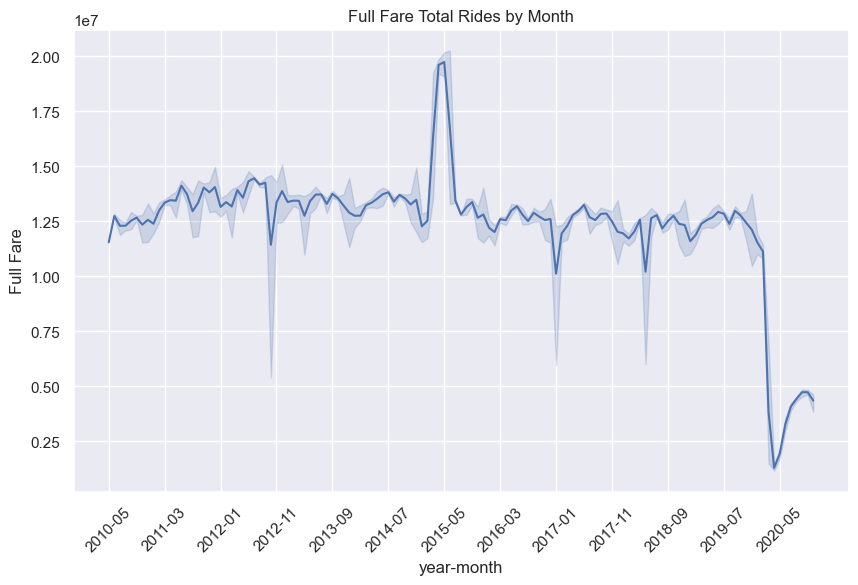

In [102]:
# plot year-month and Full Fare	

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_grouped, x='year-month', y='Full Fare')
plt.title('Full Fare Total Rides by Month')
plt.xticks(rotation=45)
ax.set_xticks(ax.get_xticks()[::10])
plt.show()


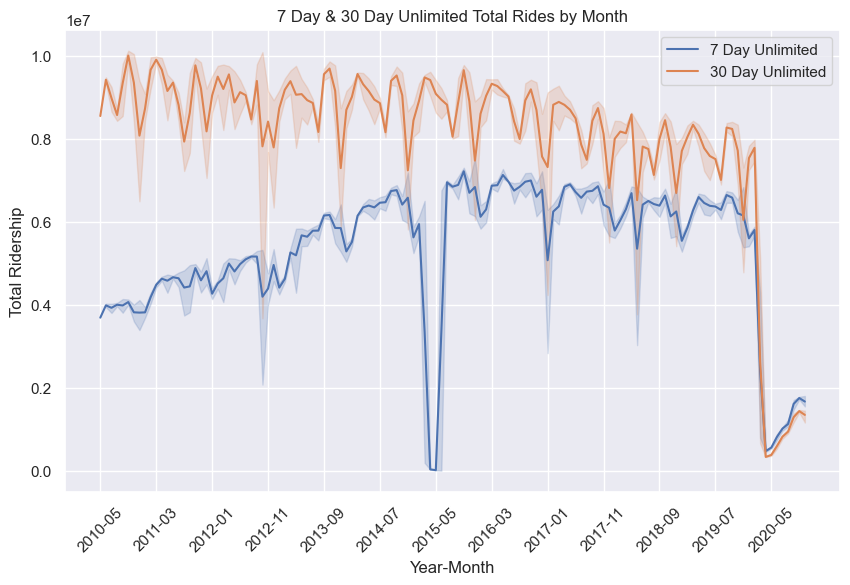

In [101]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_grouped, x='year-month', y='7 Day Unlimited', label='7 Day Unlimited')
sns.lineplot(data=df_grouped, x='year-month', y='30 Day Unlimited', label='30 Day Unlimited')

plt.title('7 Day & 30 Day Unlimited Total Rides by Month')
plt.ylabel('Total Ridership')
plt.xlabel('Year-Month')

plt.xticks(rotation=45)
ax.set_xticks(ax.get_xticks()[::10])
plt.show()

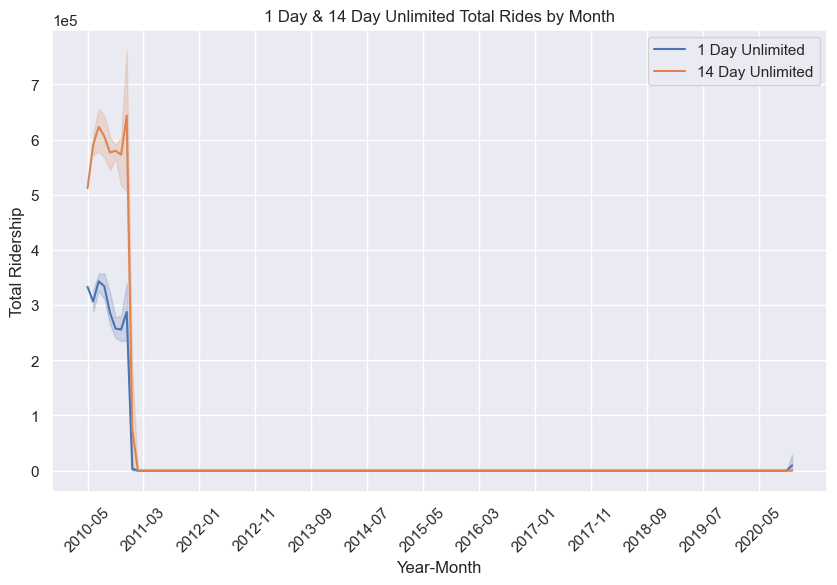

In [100]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=df_grouped, x='year-month', y='1 Day Unlimited', label='1 Day Unlimited')
sns.lineplot(data=df_grouped, x='year-month', y='14 Day Unlimited', label='14 Day Unlimited')

# y-axis scientific notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(5,5))

plt.title('1 Day & 14 Day Unlimited Total Rides by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Ridership')
plt.xticks(rotation=45)
ax.set_xticks(ax.get_xticks()[::10])
plt.show()